# Aprendizaje Automático y Big Data
## Práctica 1 : Regresión Lineal

Mario Quiñones Pérez y Guillermo García Patiño Lenza

In [31]:
import numpy as np
from mpl_tookits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv

datos = read_csv("ex1data1.csv", header = None).astype(float).to_numpy()

ModuleNotFoundError: No module named 'mpl_tookits'

In [3]:
def cost(hipotesis, datos_X, datos_Y):
    m = len(datos_X)
    estimacion = hipotesis(datos_X)
    error = estimacion - datos_Y
    v3 = sum(error**2)
    coste_def = (1/(2*m))*v3
    return coste_def

In [4]:
def calculaHipotesis(datos, alfa):
    X = datos[:,0]
    Y = datos[:,1]
    m = len(X)
    v0 = 0
    v1 = 0
    for i in range(1500):
        print("Para valores " + str(v0) + " y " + str(v1) + " el error es " + str(cost(lambda x : v0 + x*v1,X,Y)) + "\n")
        sum0 =  aplicaHipotesis(v0,v1,X) - Y
        sum1 = (aplicaHipotesis(v0,v1,X) - Y) * X
        v0 = v0 - (alfa/m) * sum(sum0)
        v1 = v1 - (alfa/m) * sum(sum1)
    return (v0,v1)

In [5]:
def aplicaHipotesis(v0,v1,X):
    return v0 + v1*X

In [6]:
def calculaHipotesis2(datos,alfa):
    X = datos[:,0]
    Y = datos[:,1]
    m = len(X)
    v0 = 0
    v1 = 0
    for _ in range(1500):
        sum0 = sum1 = 0
        print("Para valores " + str(v0) + " y " + str(v1) + " el error es " + str(cost(lambda x : v0 + x*v1,X,Y)) + "\n")
        for i in range(m):
            sum0 += (v0 + v1 * X[i]) - Y[i]
            sum1 += ((v0 + v1 * X[i]) - Y[i]) * X[i]
        v0 = v0 - (alfa/m) * sum0
        v1 = v1 - (alfa/m) * sum1
    return (v0,v1)

In [46]:
def graficasCoste(X, Y, rangoV0, rangoV1):
    paso = 0.1
    ArV0 = np.arange(rangoV0[0], rangoV1[1], paso)
    ArV1 = np.arange(rangoV1[0], rangoV1[1], paso)
    MatV0, MatV1 = np.meshgrid(ArV0, ArV1)
    Coste = np.empty_like(MatV0)
    for ix, iy in np.ndindex(MatV0.shape):
        Coste[ix, iy] = cost(lambda x : MatV0[ix, iy] + x * MatV1[ix,iy] ,X,Y)
    
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    ax.set_xlim(-10,10)
    ax.set_ylim(-1,4)
    surf = ax.plot_surface(MatV0,MatV1,Coste)
    plt.show()
    plt.figure()
    plt.contour(MatV0, MatV1, Coste, np.logspace(-10,10))
    plt.show()

In [44]:
def main1():
    datos = read_csv("ex1data1.csv", header = None).astype(float).to_numpy()
    params = calculaHipotesis(datos, 0.01)
    print("Mis parametros son " + str(params[0]) + " y " + str(params[1]) + "\n")
    X = datos[:,0]
    Y = datos[:,-1]
    min_X, max_X = min(X), max(X)
    min_Y = min_X * params[1] + params[0]
    max_Y = max_X * params[1] + params[0]
    plt.figure()
    plt.plot(X,Y,"x")
    plt.plot([min_X, max_X],[min_Y, max_Y])
    plt.show()
    plt.savefig("resultado.png")
    
    graficasCoste(X, Y, [-10,10], [-1,4])
    

Para valores 0 y 0 el error es 32.072733877455654

Para valores 0.0583913505154639 y 0.6532884974555674 el error es 6.737190464870008

Para valores 0.0628917527103938 y 0.7700097825599365 el error es 5.931593568604957

Para valores 0.05782292746142808 y 0.7913481156584673 el error es 5.901154707081387

Para valores 0.0510636251607781 y 0.795729810284954 el error es 5.895228586444221

Para valores 0.044014378365002556 y 0.7970961782721866 el error es 5.890094943117332

Para valores 0.036924131142162565 y 0.7979254732843951 el error es 5.885004158443646

Para valores 0.029837117577144787 y 0.7986582394519285 el error es 5.879932480491416

Para valores 0.022761181894038793 y 0.7993727912003019 el error es 5.874879094762575

Para valores 0.015697699574200093 y 0.8000830518518655 el error es 5.8698439118063845

Para valores 0.008646896228913493 y 0.8007914983590768 el error es 5.86482686531293

Para valores 0.0016087930989843232 y 0.8014985729280016 el error es 5.8598278899321805

Para valo

Para valores -3.5502812595429734 y 1.1583244599126077 el error es 4.487838749759594

Para valores -3.550904055712029 y 1.1583870265431462 el error es 4.4877996061063685

Para valores -3.5515257292313125 y 1.158449480391338 el error es 4.487760603446324

Para valores -3.552146282124508 y 1.1585118216604842 el error es 4.487721741271609

Para valores -3.552765716411651 y 1.158574050553519 el error es 4.487683019076203

Para valores -3.5533840341091363 y 1.1586361672730112 el error es 4.487644436355914

Para valores -3.5540012372297243 y 1.1586981720211644 el error es 4.487605992608355

Para valores -3.554617327782546 y 1.1587600649998178 el error es 4.487567687332956

Para valores -3.5552323077731116 y 1.1588218464104465 el error es 4.487529520030948

Para valores -3.555846179203316 y 1.1588835164541624 el error es 4.487491490205358

Para valores -3.5564589440714456 y 1.1589450753317154 el error es 4.487453597361009

Para valores -3.5570706043721847 y 1.159006523243493 el error es 4.4874

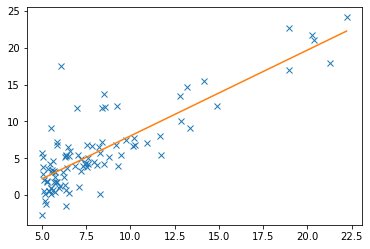

<Figure size 432x288 with 0 Axes>

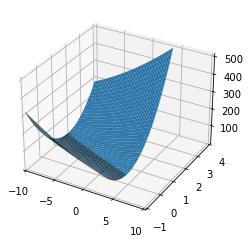

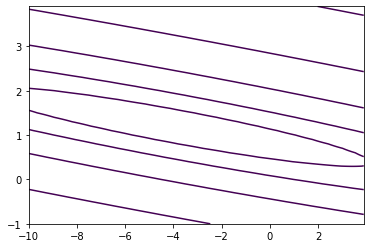

In [47]:
main1()

## Parte 2

In [83]:
datos2 = read_csv("ex1data2.csv", header = None).to_numpy().astype(float)
X = datos2[:,:-1]
Y = datos2[:,-1]
m = np.shape(X)[0]
n = np.shape(X)[1]

print(m)
print(n)

47
2


In [69]:
def normalizar(X):
    medias = X.mean(axis = 0)
    desv_tipicas = X.std(axis = 0)
    N = (X - medias.T) / desv_tipicas.T
    return (N, medias, desv_tipicas)

In [58]:
def cost_matrices(X,Y,Params):
    H = np.dot(X,Params)
    Aux = (H-Y) ** 2
    return aux.sum()/(2*len(X))

In [92]:
def desc_gradiente(X,Y,alfa):
    
    
    m = np.shape(X)[0]
    X = np.hstack([np.ones([m,1]), X])
    n = np.shape(X)[1]
    Params = np.zeros(n)
    N_Params = np.zeros(n)
    esc = alfa / m
    H = np.dot(X,Params)
    Dif = (H - Y ) 
    print(Dif)
    res1 = Dif - X[:,1]
    print(res1)
    return res1

In [93]:
desc_gradiente(X,Y,0.01)

[-399900. -329900. -369000. -232000. -539900. -299900. -314900. -198999.
 -212000. -242500. -239999. -347000. -329999. -699900. -259900. -449900.
 -299900. -199900. -499998. -599000. -252900. -255000. -242900. -259900.
 -573900. -249900. -464500. -469000. -475000. -299900. -349900. -169900.
 -314900. -579900. -285900. -249900. -229900. -345000. -549000. -287000.
 -368500. -329900. -314000. -299000. -179900. -299900. -239500.]
[-402004. -331500. -371400. -233416. -542900. -301885. -316434. -200426.
 -213380. -243994. -241939. -349000. -331889. -704378. -261168. -452200.
 -301220. -201136. -502607. -602031. -254667. -256888. -244504. -261862.
 -577790. -251000. -465958. -471526. -477200. -302537. -351739. -170900.
 -316940. -583037. -287711. -251337. -231139. -347132. -553215. -289162.
 -370164. -332138. -316567. -300200. -180752. -301752. -240703.]


array([-402004., -331500., -371400., -233416., -542900., -301885.,
       -316434., -200426., -213380., -243994., -241939., -349000.,
       -331889., -704378., -261168., -452200., -301220., -201136.,
       -502607., -602031., -254667., -256888., -244504., -261862.,
       -577790., -251000., -465958., -471526., -477200., -302537.,
       -351739., -170900., -316940., -583037., -287711., -251337.,
       -231139., -347132., -553215., -289162., -370164., -332138.,
       -316567., -300200., -180752., -301752., -240703.])